Exploratory Data analysis

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Function for plotting graph
# Input parameter : 
# list1 value for the bars
# list2 xticks value
# Output Bar graph
def plot_graph(list1, list2, xlabel, ylabel, graph_title):
    plt.bar(range(len(list2)), list2, align='center', color = "orange")
    plt.xticks(range(len(list1)), list1)
    plt.title(graph_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [3]:
# Function for validating the assumption made in read_file function
# Input parameter : first tag dictionary ,input data frame size
# Output : Percentage value stating number of tags that have the programming language as their 
# first tag.
def first_tag_validation(first_tag, data_frame_size):
    data_frame = pd.read_csv("Programming_Language.csv")
    data_frame = data_frame.apply(lambda x: x.astype(str).str.lower())
    total_value = 0
    for key, value in first_tag.items():
        for programming_language in data_frame["Language"]:
            if programming_language == key:
                total_value += value
    
    value = [total_value, data_frame_size - total_value]
    keys = ["Programming Language", "Not Programming Language"]
    plot_graph(keys, value, "key", "Number of tags", "First tag as Programming Language")
    print((total_value/data_frame_size)*100)


# Function for reading csv file
# Input parameter : file name
# Return value data frame and list which has programming language to which the question belongs
# Assumption : The first tag in the tag list is usally name of programming language
def read_file(file_name):
    data_frame = pd.read_csv(file_name, nrows = 10000)
#     data_frame = pd.read_csv(file_name)
    first_tag = {}
    programming_language_list = []
    tags_list = []
    pattern = re.compile(r"[^\'|^\,]*")
    for key, row in data_frame.iterrows():
            tag = row["tags"]
            tag_list = pattern.findall(tag[1:len(tag)-1])
            tag_list = [tag for tag in tag_list if tag != '' and tag != ' ']
            tags_list.append(tag_list)
            if tag_list[0] not in first_tag:
                first_tag[tag_list[0]] = 1
            else:
                first_tag[tag_list[0]] += 1
            programming_language_list.append(tag_list[0])
    first_tag_validation(first_tag, len(data_frame))
    data_frame["tags"] = pd.Series(tags_list)
    return data_frame, programming_language_list

In [4]:
# Function which get the Frequency distribution of number of tags
# Input parameter : data_frame
def get_tag_counts(tag_data_frame):
    tag_count = {}
    for tag in tag_data_frame:
            tag_length = len(tag)
            if tag_length not in tag_count:
                tag_count[tag_length] = 1
            else:
                tag_count[tag_length] += 1

                data_frame_size = len(tag_data_frame)
    for key, value in tag_count.items():
        print(key ," : ", (value / data_frame_size)*100)
    plot_graph(list(tag_count.keys()), list(tag_count.values()), "Tags count", "Number of tags",
              "Tags count frequency distribution")


In [5]:
# Getting the word cloud representation 
def get_word_cloud(programming_language_list):
    wordCloud = WordCloud(max_font_size = 50).generate(''.join(programming_language_list))
    plt.figure(figsize = (10, 10))
    plt.title("Programming language word cloud")
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [6]:
# Dropping all those rows(question) which have more than 3 tags
def drop_values(data_frame):
    for key, rows in data_frame.iterrows():
        if len(rows["tags"]) > 3:
            data_frame = data_frame.drop(key)
    return data_frame

def pre_processing(file_name):
    data_frame, programming_language_list = read_file("train.csv")
    get_tag_counts(data_frame["tags"])
    get_word_cloud(programming_language_list)
    data_frame = drop_values(data_frame)
    print(len(data_frame))
    return data_frame

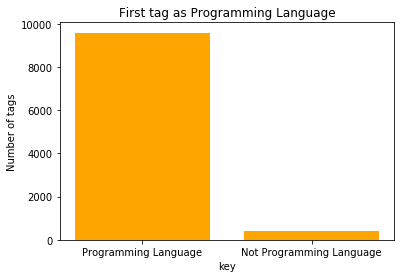

95.89
1  :  34.760000000000005
2  :  41.91
3  :  17.71
4  :  4.79
5  :  0.83


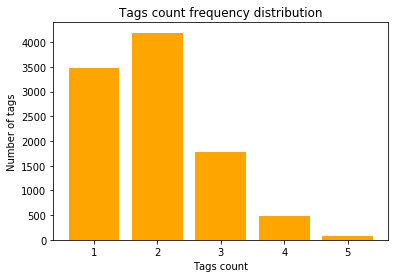

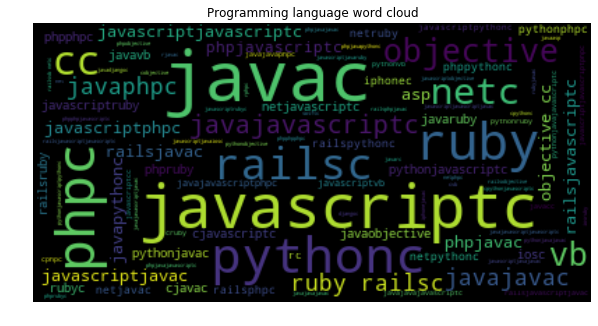

9438


In [7]:
if __name__ == "__main__":
    data_frame = pre_processing("train.csv")